# EDA of Mortality Data of US Cities between 1962 - 2016

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Profiling](#section3)<br>
    - 3.1 [Understanding the Dataset](#section31)<br/>
    - 3.2 [Pre Profiling](#section32)<br/>
    - 3.3 [Preprocessing](#section33)<br/>
    - 3.4 [Post Profiling](#section34)<br/>  
4. [Questions](#section4)<br>
    - 4.1 [Find the distribution of count of all and flu deaths by Year](#section41)<br/>
    - 4.2 [Find the distribution of count of all and flu deaths by Region](#section42)<br/>
    - 4.3 [Find the distribution of count of all and flu deaths by States](#section43)<br/>
    - 4.4 [Find the distribution of count of deaths by states in Region 2,3 & 9, which has the highest death counts](#section44)<br/>
    - 4.5 [Find the distribution of count of deaths by top 11 states, with highest death counts](#section45)<br/>
    - 4.6 [Find the distribution of count of all and flu deaths in New York state across 1962 - 2016](#section46)<br/>
    - 4.7 [Find the distribution of count of all and flu deaths by Cities](#section47)<br/>
    - 4.8 [Exploring further into the mortality data from varoious cities in the state of New York](#section48)<br/>
    - 4.9 [Find the distribution of count of all and flu deaths for the state of New York](#section49)<br/>
    - 4.10 [Find the distribution of count of all and flu deaths by Region](#section410)<br/>
    - 4.11 [Find the distribution of count of all deaths across the Years](#section411)<br/>
    - 4.12 [Find the distribution of count of Flu deaths across the Years](#section412)<br/>
    - 4.13 [Find the distribution of count of deaths across different age grouping and the Years](#section413)<br/>
    - 4.14 [Find the distribution across different death grouping and the Years where the death count is low](#section414)<br/>
    - 4.15 [Find the distribution of all deaths by State](#section415)<br/>
    - 4.16 [Find the relationship between Year, Region, All Deaths and Flu Deaths](#section416)<br/>
    - 4.17 [Find the correlation between all the features using heatmap](#section417)<br/>
    - 4.18 [ Hypothesis: Flu is not the primary reason for the counts of deaths across US](#section418)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
## 1. Problem Statement

Perform Exploratory Data Analysis on the data containing the total deaths and death due to Pneumonia / Influenza across US cities between the year 1962 till 2016 across 9 geographic regions of USA.

In this notebook, we will explore the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis (EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

__Exploratory Data Analysis__ 

Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :

- Finding patterns in Data
- Determining relationships in Data
- Checking of assumptions
- Preliminary selection of appropriate models
- Detection of mistakes

<a id=section2></a>
## 2. Data Set Loading & Additional Information

The dataset contains the complete set of data reported to US Cities Mortality Reporting System. The system was retired as of 10/6/2016. While the system was running each week, the vital statistics offices of cities across the United States reported the total number of death certificates processed and the number of those for which pneumonia or influenza was listed as the underlying or contributing cause of death by age group (Under 28 days, 28 days - 1 year, 1-14 years, 15-24 years, 25-44 years, 45-64 years, 65-74 years, 75-84 years, and - 85 years). 

<img src="https://github.com/ranjan-p/Exploratory_Data_Analysis_Excercises/blob/master/EDA_Images/Regions_of_USA.png?raw=true" width="480" height="360" />

__Attribute Information:__

01. Year in which the data was recorded
02. Week in the Year in which the data was recorded
03. End of week date for the week for which the data was recorded emded
04. Region is which the death was recorded
05. State is which the death was recorded
06. City is which the death was recorded
07. Number of deaths due to Pneumonia and Influenza
08. Total Number of deaths recorded
09. Number of deaths recorded under the age of 1 year
10. Number of deaths recorded in the age group 01-24 years
11. Number of deaths recorded in the age group 25-44 years
12. Number of deaths recorded in the age group 45-64 years
13. Number of deaths recorded above the age of 65 years  


- The dataset consists of the information about deaths (including deaths due to Pnuemonia & Influenza) in different Region, State & City of USA between years __1962 till 2016__.
- The dataset comprises of __346342 observations of 13 columns__. Below is a table showing names of all the columns and their description.

Variables included in the dataset are as follows,

| Column Name                        | Description                                                           | 
| -----------------------------------|-----------------------------------------------------------------------| 
| Year                               | Year in which the data was recorded                                   | 
| Week                               | Week in the Year in which the data was recorded                       |  
| Week Ending Date                   | End of week date for the week for which the data was recorded emded   | 
| Region                             | Region is which the death was recorded                                |
| State                              | State is which the death was recorded                                 |
| City                               | City is which the death was recorded                                  |
| Pneumonia and Influenza Deaths     | Number of deaths due to Pneumonia and Influenza                       |
| All Deaths                         | Total Number of deaths recorded                                       |
| <1 year (all cause deaths)         | Number of deaths recorded under the age of 1 year                     |
| 1-24 years (all cause deaths)      | Number of deaths recorded in the age group 1-24 years                 |
| 25-44 years                        | Number of deaths recorded in the age group 25-44 years                |
| 45-64 years (all cause deaths)     | Number of deaths recorded in the age group 45-64 years                |
| 65+ years (all cause deaths        | Number of deaths recorded above the age of 65 years                  |

In [1]:
import numpy as np                 # python library to add support for large, multi-dimensional arrays and matrices, 
                                   # along with a large collection of high-level mathematical functions to operate on 
                                   # these arrays. 
import pandas as pd                # pandas is a software library written for the Python programming language for data
                                   # manipulation and analysis. In particular, it offers data structures and operations 
                                   # for manipulating numerical tables and time series
import pandas_profiling as pp      # python module that helps in automating the first-level of EDA. Data profiling is 
                                   # about summarizing your dataset through descriptive statistics. 
import matplotlib.pyplot as plt    # Plotting library for Python programming language and it's numerical mathematics extension
                                   # NumPy
import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical graphics
# %matplotlib inline sets the backend of matplotlib to the inline backend. With this backend, the output of plotting commands is displayed 
# inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline
sns.set()                          # Set aesthetic parameters for seaborn graphs in one step.
from sklearn.preprocessing import Imputer as Im
import warnings
warnings.filterwarnings("ignore") # Discard or ignore warnings, if any.

#### Importing the Mortality data of US cities between 1962-2016

In [2]:
us_deaths_data = pd.read_csv("https://raw.githubusercontent.com/ranjan-p/Exploratory_Data_Analysis_Excercises/master/EDA_Datasets/Deaths_US_Cities_1962-2016.csv")
print("File read successful.")

File read successful.


<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will analyze the data and add new features to understand the data better. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section31></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end.

In [3]:
us_deaths_data.shape

(346342, 13)

In [4]:
us_deaths_data.columns

Index(['Year', 'WEEK', 'Week Ending Date', 'REGION', 'State', 'City',
       'Pneumonia and Influenza Deaths', 'All Deaths',
       '<1 year (all cause deaths)', '1-24 years (all cause deaths)',
       '25-44 years', '45-64 years (all cause deaths)',
       '65+ years (all cause deaths)'],
      dtype='object')

In [5]:
list(us_deaths_data.columns)

['Year',
 'WEEK',
 'Week Ending Date',
 'REGION',
 'State',
 'City',
 'Pneumonia and Influenza Deaths',
 'All Deaths',
 '<1 year (all cause deaths)',
 '1-24 years (all cause deaths)',
 '25-44 years',
 '45-64 years (all cause deaths)',
 '65+ years (all cause deaths)']

In [6]:
us_deaths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346342 entries, 0 to 346341
Data columns (total 13 columns):
Year                              346342 non-null int64
WEEK                              346342 non-null int64
Week Ending Date                  346342 non-null object
REGION                            346342 non-null int64
State                             340300 non-null object
City                              340300 non-null object
Pneumonia and Influenza Deaths    343058 non-null float64
All Deaths                        344871 non-null float64
<1 year (all cause deaths)        338953 non-null float64
1-24 years (all cause deaths)     339374 non-null float64
25-44 years                       342711 non-null float64
45-64 years (all cause deaths)    344662 non-null float64
65+ years (all cause deaths)      344845 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 34.4+ MB


#### Observations

1. The dataset has 13 coulumns.
2. The data has a total of 346342 rows.
3. The dataset has integer, object & float data.


In [7]:
us_deaths_data.isnull().sum()

Year                                 0
WEEK                                 0
Week Ending Date                     0
REGION                               0
State                             6042
City                              6042
Pneumonia and Influenza Deaths    3284
All Deaths                        1471
<1 year (all cause deaths)        7389
1-24 years (all cause deaths)     6968
25-44 years                       3631
45-64 years (all cause deaths)    1680
65+ years (all cause deaths)      1497
dtype: int64

#### Observations

1. The dataset has lots of Null entires, with least null values in the column "All Deaths" & maximum null values in the column "<1 year (all cause deaths)".

In [8]:
us_deaths_data.describe()

,Year,WEEK,REGION,Pneumonia and Influenza Deaths,All Deaths,<1 year (all cause deaths),1-24 years (all cause deaths),25-44 years,45-64 years (all cause deaths),65+ years (all cause deaths)
count,346342.000000,346342.000000,346342.000000,343058.000000,344871.000000,338953.000000,339374.000000,342711.000000,344662.000000,344845.000000
mean,1988.804497,26.499229,4.651001,5.435617,100.781130,3.283939,3.096304,7.320713,23.290070,63.899192
std,15.796506,15.038563,2.684513,7.569441,146.427288,5.523174,5.088646,13.279231,35.829121,91.762139
min,1962.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,13.000000,2.000000,1.000000,37.000000,0.000000,1.000000,2.000000,7.000000,24.000000
50%,1989.000000,26.000000,4.000000,3.000000,63.000000,2.000000,2.000000,4.000000,14.000000,41.000000
75%,2002.000000,39.000000,7.000000,7.000000,119.000000,4.000000,4.000000,8.000000,27.000000,76.000000
max,2016.000000,53.000000,9.000000,280.000000,2550.000000,217.000000,131.000000,489.000000,728.000000,1785.000000


#### Observations

1. Max count of all deaths in a given week is 2550.

In [9]:
us_deaths_data.tail()

,Year,WEEK,Week Ending Date,REGION,State,City,Pneumonia and Influenza Deaths,All Deaths,<1 year (all cause deaths),1-24 years (all cause deaths),25-44 years,45-64 years (all cause deaths),65+ years (all cause deaths)
346337,2016,35,09/03/2016,9,WA,Tacoma,10.0,136.0,2.0,2.0,11.0,27.0,94.0
346338,2016,36,09/10/2016,9,WA,Tacoma,7.0,136.0,1.0,2.0,5.0,22.0,106.0
346339,2016,37,09/17/2016,9,WA,Tacoma,2.0,129.0,2.0,2.0,7.0,27.0,91.0
346340,2016,38,09/24/2016,9,WA,Tacoma,12.0,143.0,2.0,1.0,7.0,35.0,98.0
346341,2016,39,10/01/2016,9,WA,Tacoma,11.0,136.0,0.0,3.0,10.0,30.0,93.0


In [10]:
us_deaths_data.groupby(['REGION', 'State','City']).size().head()

REGION  State  City      
1       CT     Bridgeport    2854
               Hartford      2856
               New Haven     2831
               Waterbury     2857
        MA     Boston        2856
dtype: int64

In [11]:
us_deaths_data.loc[us_deaths_data['State'] == "CT"].head()

,Year,WEEK,Week Ending Date,REGION,State,City,Pneumonia and Influenza Deaths,All Deaths,<1 year (all cause deaths),1-24 years (all cause deaths),25-44 years,45-64 years (all cause deaths),65+ years (all cause deaths)
2281,1995,2,01/14/1995,1,CT,Hartford,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2857,1962,1,01/06/1962,1,CT,Bridgeport,3.0,46.0,3.0,0.0,0.0,16.0,27.0
2858,1962,2,01/13/1962,1,CT,Bridgeport,2.0,43.0,1.0,0.0,1.0,11.0,30.0
2859,1962,3,01/20/1962,1,CT,Bridgeport,2.0,40.0,5.0,1.0,3.0,10.0,21.0
2860,1962,4,01/27/1962,1,CT,Bridgeport,4.0,46.0,3.0,1.0,7.0,10.0,25.0


<a id=section32></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Granular level_ analysis of each column.

In [12]:
us_deaths_data_profile = pp.ProfileReport(us_deaths_data)
us_deaths_data_profile.to_file(outputfile="us_deaths_data_before_preprocessing.html")
pp.ProfileReport(us_deaths_data)

Number of variables,13
Number of observations,346342
Total Missing (%),0.7%
Total size in memory,34.4 MiB
Average record size in memory,104.0 B
Numeric,7
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,3


<a id=section33></a>
### 3.3 Preprocessing

As part of the preprocessing, we will cleanup the data, fill the null data and also rename the columns to make it more meaning full.

In [13]:
# Using Imputer package from sklearn, fill the missing values by the mean of that data column.
t_cols = ['Pneumonia and Influenza Deaths', 'All Deaths', '<1 year (all cause deaths)', \
          '1-24 years (all cause deaths)', '25-44 years', '45-64 years (all cause deaths)', '65+ years (all cause deaths)']
us_deaths_data_nonull = us_deaths_data

imp = Im(missing_values=np.nan, strategy='mean')
us_deaths_data_nonull[t_cols] = imp.fit_transform(us_deaths_data_nonull[t_cols])
us_deaths_data_nonull = us_deaths_data_nonull.fillna(method='ffill', limit=None)
us_deaths_data_nonull.head()

,Year,WEEK,Week Ending Date,REGION,State,City,Pneumonia and Influenza Deaths,All Deaths,<1 year (all cause deaths),1-24 years (all cause deaths),25-44 years,45-64 years (all cause deaths),65+ years (all cause deaths)
0,1962,1,01/06/1962,1,MA,Boston,11.0,262.0,10.0,8.0,11.0,87.0,146.0
1,1962,2,01/13/1962,1,MA,Boston,11.0,270.0,14.0,8.0,11.0,70.0,167.0
2,1962,3,01/20/1962,1,MA,Boston,5.0,237.0,11.0,8.0,10.0,66.0,142.0
3,1962,4,01/27/1962,1,MA,Boston,12.0,285.0,22.0,7.0,8.0,73.0,175.0
4,1962,5,02/03/1962,1,MA,Boston,5.0,245.0,15.0,9.0,17.0,62.0,142.0


In [14]:
us_deaths_data_nonull.isnull().sum()

Year                              0
WEEK                              0
Week Ending Date                  0
REGION                            0
State                             0
City                              0
Pneumonia and Influenza Deaths    0
All Deaths                        0
<1 year (all cause deaths)        0
1-24 years (all cause deaths)     0
25-44 years                       0
45-64 years (all cause deaths)    0
65+ years (all cause deaths)      0
dtype: int64

In [15]:
us_deaths_data_nonull.columns = ["Year","Week","Week_End_Date","Region","State","City","Flu_Deaths","All_Deaths","All_Deaths_Less_1Yr", \
                          "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"]
us_deaths_data_nonull.head()

,Year,Week,Week_End_Date,Region,State,City,Flu_Deaths,All_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More
0,1962,1,01/06/1962,1,MA,Boston,11.0,262.0,10.0,8.0,11.0,87.0,146.0
1,1962,2,01/13/1962,1,MA,Boston,11.0,270.0,14.0,8.0,11.0,70.0,167.0
2,1962,3,01/20/1962,1,MA,Boston,5.0,237.0,11.0,8.0,10.0,66.0,142.0
3,1962,4,01/27/1962,1,MA,Boston,12.0,285.0,22.0,7.0,8.0,73.0,175.0
4,1962,5,02/03/1962,1,MA,Boston,5.0,245.0,15.0,9.0,17.0,62.0,142.0


In [16]:
us_deaths_data_nonull['Flu_Deaths'] = us_deaths_data_nonull['Flu_Deaths'].astype(int)
us_deaths_data_nonull['All_Deaths'] = us_deaths_data_nonull['All_Deaths'].astype(int)
us_deaths_data_nonull['All_Deaths_Less_1Yr']= us_deaths_data_nonull['All_Deaths_Less_1Yr'].astype(int)
us_deaths_data_nonull['All_Deaths_1_24Yr']= us_deaths_data_nonull['All_Deaths_1_24Yr'].astype(int)
us_deaths_data_nonull['All_Deaths_25_44Yr']= us_deaths_data_nonull['All_Deaths_25_44Yr'].astype(int)
us_deaths_data_nonull['All_Deaths_45_64Yr']= us_deaths_data_nonull['All_Deaths_45_64Yr'].astype(int)
us_deaths_data_nonull['All_Deaths_65Yr_More']= us_deaths_data_nonull['All_Deaths_65Yr_More'].astype(int)
us_deaths_data_nonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346342 entries, 0 to 346341
Data columns (total 13 columns):
Year                    346342 non-null int64
Week                    346342 non-null int64
Week_End_Date           346342 non-null object
Region                  346342 non-null int64
State                   346342 non-null object
City                    346342 non-null object
Flu_Deaths              346342 non-null int32
All_Deaths              346342 non-null int32
All_Deaths_Less_1Yr     346342 non-null int32
All_Deaths_1_24Yr       346342 non-null int32
All_Deaths_25_44Yr      346342 non-null int32
All_Deaths_45_64Yr      346342 non-null int32
All_Deaths_65Yr_More    346342 non-null int32
dtypes: int32(7), int64(3), object(3)
memory usage: 25.1+ MB


In [17]:
us_deaths_data_nonull.describe()

,Year,Week,Region,Flu_Deaths,All_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More
count,346342.000000,346342.000000,346342.000000,346342.000000,346342.000000,346342.000000,346342.000000,346342.000000,346342.000000,346342.000000
mean,1988.804497,26.499229,4.651001,5.431487,100.777812,3.277881,3.094366,7.317351,23.288663,63.895306
std,15.796506,15.038563,2.684513,7.533587,146.116009,5.464093,5.037215,13.209479,35.742122,91.563630
min,1962.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,13.000000,2.000000,1.000000,37.000000,0.000000,1.000000,2.000000,8.000000,24.000000
50%,1989.000000,26.000000,4.000000,3.000000,63.000000,2.000000,2.000000,4.000000,14.000000,41.000000
75%,2002.000000,39.000000,7.000000,7.000000,119.000000,4.000000,4.000000,8.000000,27.000000,76.000000
max,2016.000000,53.000000,9.000000,280.000000,2550.000000,217.000000,131.000000,489.000000,728.000000,1785.000000


In [18]:
u_City = len(us_deaths_data_nonull['City'].unique())
u_State = len(us_deaths_data_nonull['State'].unique())
u_Region = len(us_deaths_data_nonull['Region'].unique())

print("Number of unique Cities present in the dataset: " + str(u_City))
print("Number of unique States present in the dataset: " + str(u_State))
print("Number of unique Regions present in the dataset: " + str(u_Region))

Number of unique Cities present in the dataset: 121
Number of unique States present in the dataset: 40
Number of unique Regions present in the dataset: 9


In [19]:
us_deaths_data_nonull['Max_Deaths_Age_Group'] = us_deaths_data_nonull[["All_Deaths_Less_1Yr","All_Deaths_1_24Yr","All_Deaths_25_44Yr", \
                                                    "All_Deaths_45_64Yr","All_Deaths_65Yr_More"]].idxmax(axis=1)
us_deaths_data_nonull.head(4)

,Year,Week,Week_End_Date,Region,State,City,Flu_Deaths,All_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More,Max_Deaths_Age_Group
0,1962,1,01/06/1962,1,MA,Boston,11,262,10,8,11,87,146,All_Deaths_65Yr_More
1,1962,2,01/13/1962,1,MA,Boston,11,270,14,8,11,70,167,All_Deaths_65Yr_More
2,1962,3,01/20/1962,1,MA,Boston,5,237,11,8,10,66,142,All_Deaths_65Yr_More
3,1962,4,01/27/1962,1,MA,Boston,12,285,22,7,8,73,175,All_Deaths_65Yr_More


In [20]:
us_deaths_data_nonull.loc[us_deaths_data_nonull['All_Deaths_65Yr_More'] == 0].head()

,Year,Week,Week_End_Date,Region,State,City,Flu_Deaths,All_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More,Max_Deaths_Age_Group
19591,2008,33,08/16/2008,1,MA,Lynn,0,1,0,0,0,1,0,All_Deaths_45_64Yr
19605,2008,47,11/22/2008,1,MA,Lynn,0,0,0,0,0,0,0,All_Deaths_Less_1Yr
19909,2014,38,09/20/2014,1,MA,Lynn,0,4,0,0,1,3,0,All_Deaths_45_64Yr
19912,2014,41,10/11/2014,1,MA,Lynn,0,3,0,0,1,2,0,All_Deaths_45_64Yr
19970,2015,47,11/28/2015,1,MA,Lynn,0,0,0,0,0,0,0,All_Deaths_Less_1Yr


In [21]:
us_deaths_data_nonull.shape

(346342, 14)

In [22]:
us_deaths_data_nonull_dup = us_deaths_data_nonull[us_deaths_data_nonull.duplicated()]
us_deaths_data_nonull_dup

,Year,Week,Week_End_Date,Region,State,City,Flu_Deaths,All_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More,Max_Deaths_Age_Group


#### Observations

1. There are no duplicate rows n the dataset.

In [23]:
us_deaths_data_nonull["City"].value_counts().head()

Kansas City    5709
Yonkers        5205
Wilimington    4447
Tucson         4378
Nashville      3026
Name: City, dtype: int64

#### Observations

1. There are 121 unique cities in the dataset.

In [24]:
us_deaths_data_nonull["State"].min()

'AL'

In [25]:
us_deaths_data_region = us_deaths_data_nonull.drop(['Week', 'Week_End_Date', 'State', 'City'], axis=1)
us_deaths_data_state = us_deaths_data_nonull.drop(['Week', 'Week_End_Date', 'Region', 'City'], axis=1)
us_deaths_data_city = us_deaths_data_nonull.drop(['Week', 'Week_End_Date', 'State', 'Region'], axis=1)
us_deaths_data_nowrsc = us_deaths_data_nonull.drop(['Week', 'Week_End_Date', 'Region', 'State', 'City'], axis=1)
us_deaths_data_nowrsc.head(5)

,Year,Flu_Deaths,All_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More,Max_Deaths_Age_Group
0,1962,11,262,10,8,11,87,146,All_Deaths_65Yr_More
1,1962,11,270,14,8,11,70,167,All_Deaths_65Yr_More
2,1962,5,237,11,8,10,66,142,All_Deaths_65Yr_More
3,1962,12,285,22,7,8,73,175,All_Deaths_65Yr_More
4,1962,5,245,15,9,17,62,142,All_Deaths_65Yr_More


#### Observations

1. The sample population consists of only Adults (25 - 64 years) & Senior Citizens (65 years or more). Adults count is 258, 
   while the Seniors are 48. There were 0 Young (under 25 years) patients.

In [26]:
us_deaths_data_by_year = us_deaths_data_nowrsc.groupby(['Year'])[["Flu_Deaths","All_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"]].sum().reset_index()
us_deaths_data_by_year.head()

,Year,Flu_Deaths,All_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More
0,1962,24831,623009,42424,19656,41470,172322,347137
1,1963,28022,642538,40986,20489,42446,177432,361185
2,1964,26253,647479,40972,21077,43725,180124,361581
3,1965,25962,640903,37531,20945,43058,177315,362054
4,1966,26397,650399,34714,21759,42813,178879,372234


In [27]:
data = us_deaths_data_nonull
data.head()
data.sort_values(["Flu_Deaths","All_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"], axis=0, 
                ascending=[False, False, False, False, False, False, False], inplace=True) 
data.head(10)
#data.tail(204)

,Year,Week,Week_End_Date,Region,State,City,Flu_Deaths,All_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More,Max_Deaths_Age_Group
60689,1976,7,02/21/1976,2,NY,New York,280,2550,42,53,155,515,1785,All_Deaths_65Yr_More
60316,1968,52,12/28/1968,2,NY,New York,242,2376,56,63,176,728,1353,All_Deaths_65Yr_More
318674,2004,2,01/17/2004,9,CA,Los Angeles,231,1738,23,33,88,285,1309,All_Deaths_65Yr_More
60315,1968,51,12/21/1968,2,NY,New York,208,2342,63,64,154,700,1361,All_Deaths_65Yr_More
60317,1969,1,01/04/1969,2,NY,New York,208,2166,56,68,143,605,1294,All_Deaths_65Yr_More
318677,2004,5,02/07/2004,9,CA,Los Angeles,208,1755,25,42,122,328,1238,All_Deaths_65Yr_More
318678,2004,6,02/14/2004,9,CA,Los Angeles,196,1379,27,34,80,227,1011,All_Deaths_65Yr_More
60688,1976,6,02/14/1976,2,NY,New York,187,1830,32,45,107,412,1234,All_Deaths_65Yr_More
60266,1968,2,01/13/1968,2,NY,New York,181,2354,52,42,137,586,1537,All_Deaths_65Yr_More
318673,2004,1,01/10/2004,9,CA,Los Angeles,175,1489,11,35,88,241,1114,All_Deaths_65Yr_More


In [28]:
data_nodeaths = data.loc[(data['All_Deaths'] == 0) & (data['Flu_Deaths'] == 0) & (data['All_Deaths_Less_1Yr'] == 0) \
          & (data['All_Deaths_1_24Yr'] == 0) & (data['All_Deaths_25_44Yr'] == 0) & (data['All_Deaths_45_64Yr'] == 0) \
        & (data['All_Deaths_65Yr_More'] == 0)]
data_nodeaths.count()

Year                    202
Week                    202
Week_End_Date           202
Region                  202
State                   202
City                    202
Flu_Deaths              202
All_Deaths              202
All_Deaths_Less_1Yr     202
All_Deaths_1_24Yr       202
All_Deaths_25_44Yr      202
All_Deaths_45_64Yr      202
All_Deaths_65Yr_More    202
Max_Deaths_Age_Group    202
dtype: int64

#### Observations

1. There are 202 entires in the dataset, which has 0 deaths.

<a id=section34></a>
### 3.4 Post Pandas Profiling

In [29]:
us_deaths_data_profile = pp.ProfileReport(us_deaths_data)
us_deaths_data_profile.to_file(outputfile="us_deaths_data_after_preprocessing.html")
pp.ProfileReport(us_deaths_data_nonull)

Number of variables,15
Number of observations,346342
Total Missing (%),0.0%
Total size in memory,30.4 MiB
Average record size in memory,92.0 B
Numeric,7
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,4


<a id=section4></a>
## 4. Questions

Now we have preprocessed the data and removed the null entires. So, pandas profiling report which we have generated after preprocessing will give us better insights. You can compare the two reports, i.e __us_deaths_data_after_preprocessing.html__ and __us_deaths_data_before_preprocessing.html__.<br/>

Observe the newly created variable features and click on Toggle details to get more detailed information about it.

<a id=section41></a>
### 4.1 Find the distribution of count of all and flu deaths by Year

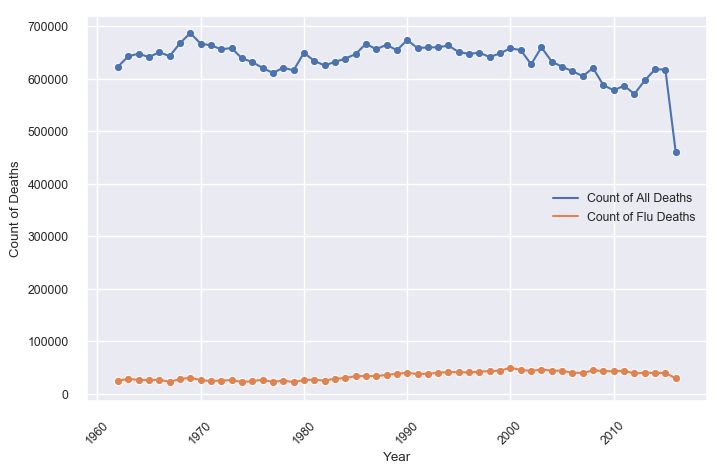

In [30]:
sns.set(font_scale = 0.8)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Year', y='All_Deaths', palette="RdYlBu",data=us_deaths_data_by_year)
sns.lineplot(x='Year', y='All_Deaths', palette="RdYlBu",data=us_deaths_data_by_year)
sns.scatterplot(x='Year', y='Flu_Deaths', palette="RdYlBu",data=us_deaths_data_by_year)
sns.lineplot(x='Year', y='Flu_Deaths', palette="RdYlBu",data=us_deaths_data_by_year)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Count of Deaths')
plt.legend(labels=['Count of All Deaths', 'Count of Flu Deaths'])
plt.show()

#### Observations

1. The count of all & flu related deaths follow a relatively similar pattern across years, except in 2016, where it decreased significantly.

<a id=section42></a>
### 4.2 Find the distribution of count of all and flu deaths by Region

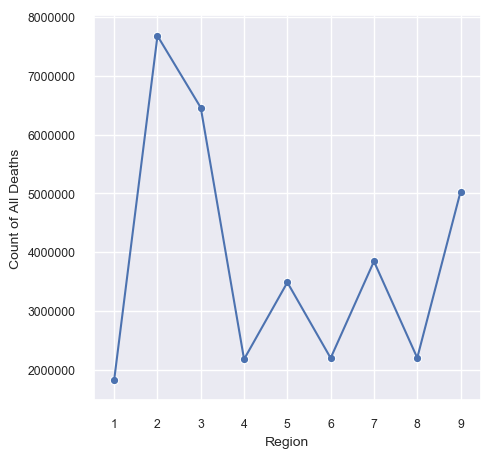

In [31]:
sns.set(font_scale = 0.8)
plt.figure(figsize=(5,5))
us_deaths_data_region_plot = us_deaths_data_region.groupby(['Region']).sum().reset_index()
sns.lineplot(x='Region', y='All_Deaths', palette="RdYlBu", legend=False, data=us_deaths_data_region_plot)
sns.scatterplot(x='Region', y='All_Deaths', palette="RdYlBu", legend=False, data=us_deaths_data_region_plot)
plt.xlabel("Region", fontsize=10)
plt.ylabel('Count of All Deaths', fontsize=10)
plt.show()

#### Observations

1. Region 2, 3 & 9, has the highest count of all deaths.
2. Region 5 & 7 has lower count of all deaths.
3. Region 4, 6 & 8 has the lowest count of all deaths.

<a id=section43></a>
### 4.3 Find the distribution of count of all and flu deaths by States

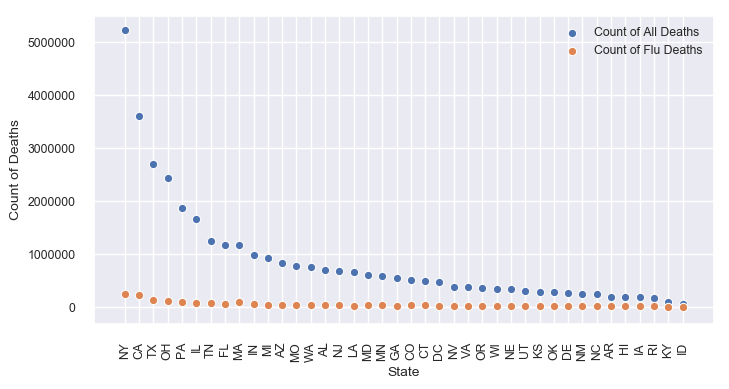

In [32]:
sns.set(font_scale = 0.8)
us_deaths_data_by_state = us_deaths_data_state.groupby(['State'])[["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"]].sum().reset_index()
us_deaths_data_by_state.sort_values(["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"], axis=0, 
                    ascending=[False, False, False, False, False, False, False], inplace=True) 
plt.figure(figsize=(8,4))
sns.scatterplot(x='State', y='All_Deaths', palette="RdYlBu",data=us_deaths_data_by_state)
sns.scatterplot(x='State', y='Flu_Deaths', palette="RdYlBu",data=us_deaths_data_by_state)
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10)
plt.ylabel('Count of Deaths', fontsize=10)
plt.legend(labels=['Count of All Deaths', 'Count of Flu Deaths'])
plt.show()

#### Observations

1. New York, California, Texas, Ohio, Pennsylvania and Illinoi has the highest count of all deaths.
2. Similarly, Idaho, Kentucky, Rhode Island, Iowa, Hawaii etc have the lowest count of all deaths.

<a id=section44></a>
### 4.4 Find the distribution of count of deaths by states in Region 2,3 & 9, which has the highest death counts

In [33]:
rg = [2,3,9]
us_deaths_data_by_region239 = us_deaths_data_nonull.loc[(us_deaths_data_nonull['Region'].isin(rg))]
us_deaths_data_by_region239 = us_deaths_data_by_region239.drop(['Week', 'Week_End_Date'], axis=1)
us_deaths_data_by_region239 = us_deaths_data_by_region239.groupby(['State'])[["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"]].sum().reset_index()
us_deaths_data_by_region239.sort_values(["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"], axis=0, 
                    ascending=[False, False, False, False, False, False, False], inplace=True) 
us_deaths_data_by_region239

,State,All_Deaths,Flu_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More
9,NY,5231074,246539,135214,126803,381661,1169279,3422098
1,CA,3609635,231649,95633,104799,265421,771036,2371261
10,OH,2443513,114721,79337,65784,144896,563529,1592382
13,PA,1872568,95651,57899,48328,116739,448777,1205279
4,IL,1661793,79228,67532,67534,143310,417363,965783
5,IN,989858,52689,33061,30965,61941,223955,641909
7,MI,921299,42496,35709,31385,74358,233018,547201
14,WA,747592,38848,19960,19697,44063,156880,506590
8,NJ,676185,36744,31105,21740,64187,173269,391893
12,OR,361489,15347,10181,9562,20903,76467,244234


#### Observations

1. New York, California, Texas, Ohio, Pennsylvania and Illinoi has the highest count of all deaths.
2. Similarly, Idaho, Kentucky, Rhode Island, Iowa, Hawaii etc have the lowest count of all deaths.

<a id=section45></a>
### 4.5 Find the distribution of count of deaths by top 11 states, with highest death counts

In [34]:
st = ['NY', 'CA', 'TX', 'OH', 'PA', 'IL', 'TN', 'FL', 'MA', 'IN', 'MI']
us_deaths_data_by_state_high_deaths = us_deaths_data_nonull.loc[(us_deaths_data_nonull['State'].isin(st))]
us_deaths_data_by_state_high_deaths = us_deaths_data_by_state_high_deaths.drop(['Week', 'Week_End_Date'], axis=1)
us_deaths_data_by_state_high_deaths = us_deaths_data_by_state_high_deaths.groupby(['City'])[["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"]].sum().reset_index()
us_deaths_data_by_state_high_deaths.sort_values(["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"], axis=0, 
                    ascending=[False, False, False, False, False, False, False], inplace=True) 
us_deaths_data_by_state_high_deaths.head()

,City,All_Deaths,Flu_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More
41,New York,3873239,155992,93745,92529,311986,887078,2487154
10,Chicago,1402878,60010,57835,60532,130025,365543,788084
34,Los Angeles,1264675,60101,32560,42473,103760,274489,807845
44,Philadelphia,1025463,43875,34487,28829,73908,257941,629943
28,Houston,880405,40141,31803,40681,91994,231649,484189


#### Observations

1. New York, California, Texas, Ohio, Pennsylvania and Illinoi has the highest count of all deaths.
2. Similarly, Idaho, Kentucky, Rhode Island, Iowa, Hawaii etc have the lowest count of all deaths.

<a id=section46></a>
### 4.6 Find the distribution of count of all and flu deaths in New York state across 1962 - 2016

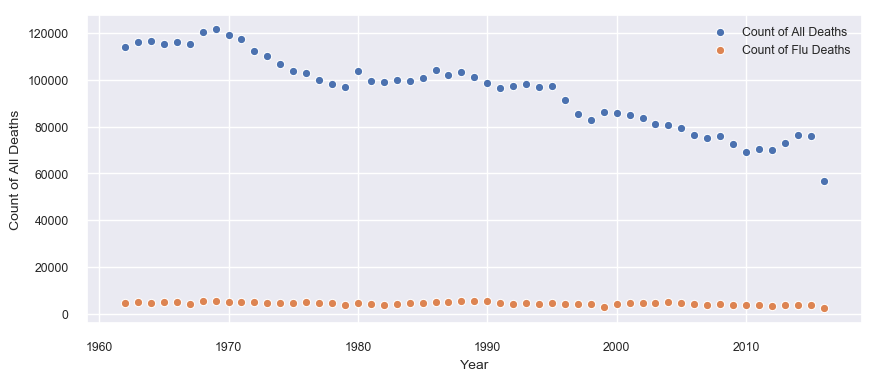

In [35]:
sns.set(font_scale = 0.8)
plt.figure(figsize=(10,4))
us_deaths_data_year_NY = us_deaths_data_nonull.loc[(us_deaths_data_nonull['State'] == "NY")]
us_deaths_data_year_NY = us_deaths_data_year_NY.groupby(['Year']).sum().reset_index()
sns.scatterplot(x='Year', y='All_Deaths', palette="RdYlBu", legend=False, data=us_deaths_data_year_NY)
sns.scatterplot(x='Year', y='Flu_Deaths', palette="RdYlBu", legend=False, data=us_deaths_data_year_NY)
plt.xlabel("Year", fontsize=10)
plt.ylabel('Count of All Deaths', fontsize=10)
plt.legend(labels=['Count of All Deaths', 'Count of Flu Deaths'])
plt.show()

#### Observations

1. On further exploring the data of New York state, we can find that the count of Flu related deaths has been relatively similary across years.
2. The deaths of all deaths have gradually decreased over the years.

<a id=section47></a>
### 4.7 Find the distribution of count of all and flu deaths by Cities

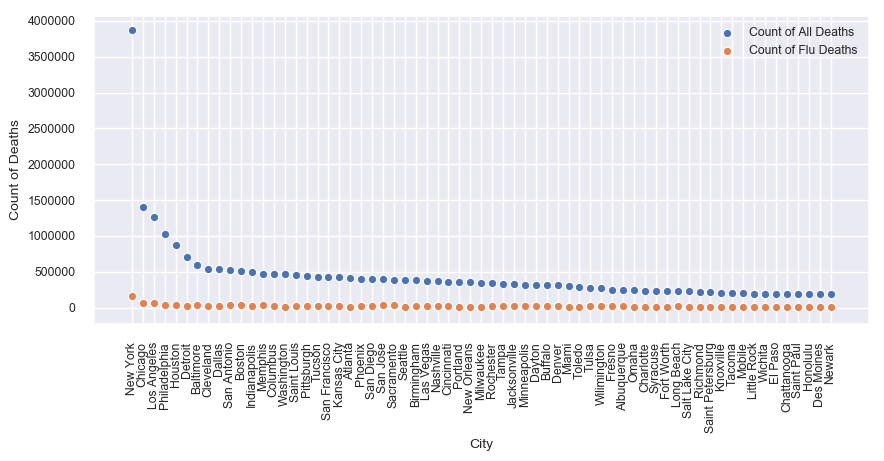

In [36]:
sns.set(font_scale = 0.8)
us_deaths_data_by_city = us_deaths_data_city.groupby(['City'])[["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"]].sum().reset_index()
us_deaths_data_by_city.sort_values(["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"], axis=0, 
                ascending=[False, False, False, False, False, False, False], inplace=True) 
us_deaths_data_by_city_head = us_deaths_data_by_city.head(65)
plt.figure(figsize=(10,4))
sns.scatterplot(x='City', y='All_Deaths', palette="RdYlBu", data=us_deaths_data_by_city_head)
sns.scatterplot(x='City', y='Flu_Deaths', palette="RdYlBu", data=us_deaths_data_by_city_head)
plt.xticks(rotation = 90)
plt.xlabel('City', fontsize=10)
plt.ylabel('Count of Deaths', fontsize=10)
plt.legend(labels=['Count of All Deaths', 'Count of Flu Deaths'])
plt.show()

#### Observations

1. The maximum cumulitive deaths have occurred in the cities of New York, Chicago, Los Angeles, Philadelphia, Houston, Detroit & Baltimore. 
2. The least cumulitive deats have occurred in the cities of Newark, Des Moines, Honululu, Saint Paul etc.
3. In all the cities except New York, the flu related deaths are following the same relative pattern.

<a id=section48></a>
### 4.8 Exploring further into the mortality data from varoious cities in the state of New York

In [37]:
us_deaths_data_by_state_NY = us_deaths_data_nonull.loc[(us_deaths_data_nonull['State'] == "NY")]
us_deaths_data_by_state_NY = us_deaths_data_by_state_NY.drop(['Week', 'Week_End_Date'], axis=1)
us_deaths_data_by_state_NY = us_deaths_data_by_state_NY.groupby(['City'])[["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"]].sum().reset_index()
us_deaths_data_by_state_NY.sort_values(["All_Deaths", "Flu_Deaths","All_Deaths_Less_1Yr", \
                    "All_Deaths_1_24Yr","All_Deaths_25_44Yr","All_Deaths_45_64Yr","All_Deaths_65Yr_More"], axis=0, 
                    ascending=[False, False, False, False, False, False, False], inplace=True) 
us_deaths_data_by_state_NY

,City,All_Deaths,Flu_Deaths,All_Deaths_Less_1Yr,All_Deaths_1_24Yr,All_Deaths_25_44Yr,All_Deaths_45_64Yr,All_Deaths_65Yr_More
2,New York,3873239,155992,93745,92529,311986,887078,2487154
3,Rochester,343784,27532,8565,7316,15717,64015,248279
1,Buffalo,317247,19540,10081,7948,17783,75443,205926
5,Syracuse,237286,13864,7146,5318,10856,47164,167383
7,Yonkers,183515,14042,7830,6922,11789,39895,118735
0,Albany,142275,6277,5750,4144,7643,30345,94558
4,Schenectady,71990,4270,859,1276,3007,14022,53001
6,Utica,61738,5022,1238,1350,2880,11317,47062


#### Observations

1. The maximum cumulitive deaths of 3.8 Million occurred in the city of New York, between the year 1962-2016. The interesting finding, most of these deaths are non-flu related.
2. For other 8 cities in the NY state, has relatively similar proportion of all deaths & flu related deaths.
3. The city of Ultica has the lowest count of all deaths.
4. The city of Schenectady has the lowest flu related deaths.
5. In all the cities, the death in the age group 65 years or more, is highest compared to all the other age groups.

<a id=section49></a>
### 4.9 Find the distribution of count of all and flu deaths for the state of New York

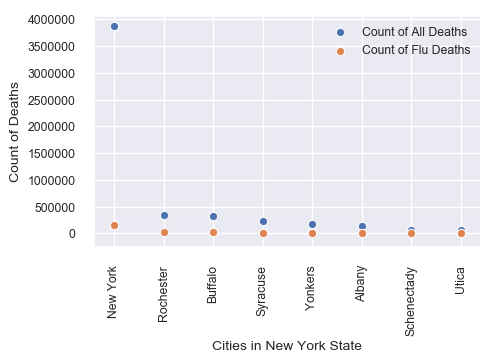

In [38]:
sns.set(font_scale = 0.8)
plt.figure(figsize=(5,3))
sns.scatterplot(x='City', y='All_Deaths', palette="RdYlBu",data=us_deaths_data_by_state_NY)
sns.scatterplot(x='City', y='Flu_Deaths', palette="RdYlBu",data=us_deaths_data_by_state_NY)
plt.legend(labels=['Count of All Deaths', 'Count of Flu Deaths'])
plt.xticks(rotation=90)
plt.xlabel('Cities in New York State', fontsize=10)
plt.ylabel('Count of Deaths', fontsize=10)
plt.show()

#### Observations

1. The maximum deaths occurred in the city of New York. The interesting finding, most of these deaths are non-flu related.
2. For other 8 cities in the NY state, has relatively similar proportion of all deaths & flu related deaths.

<a id=section410></a>
### 4.10 Find the distribution of count of all and flu deaths by Region

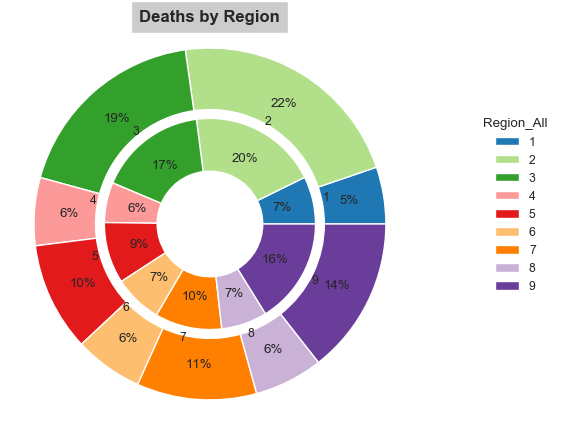

In [39]:
plt.figure(figsize=(5, 5))
cmap = plt.get_cmap("Paired")
outer_colors = cmap(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]))
inner_colors = cmap(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

pie_plot1 = us_deaths_data_region.All_Deaths.groupby(us_deaths_data_nonull.Region).sum() \
                  .plot(kind='pie', autopct='%1.0f%%', pctdistance=0.8, labels= None, radius=2.0, \
                        center = (0,0), colors=outer_colors, wedgeprops=dict(width=0.7, edgecolor='w'))

pie_plot2 = us_deaths_data_region.Flu_Deaths.groupby(us_deaths_data_nonull.Region).sum() \
                  .plot(kind='pie', autopct='%1.0f%%', pctdistance=0.7, radius=1.2, center = (0,0), \
                        colors=inner_colors, wedgeprops=dict(width=0.6, edgecolor='w'))
plt.axis('equal')
plt.ylabel("")
pie_plot2.legend(title="Region_All", bbox_to_anchor=(1.4,0.8))

plt.title("Deaths by Region", fontweight="bold", fontsize=12, bbox= {'facecolor':'0.8', 'pad':6})
plt.show()

#### Observations

1. From the pie chart, it is clear that, the count of flu related deaths is proportional to the count of all deaths in a given region.
2. Most of the deaths occurred in Region 2, 3, 9, 7 & 5.

<a id=section411></a>
### 4.11 Find the distribution of count of all deaths across the Years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

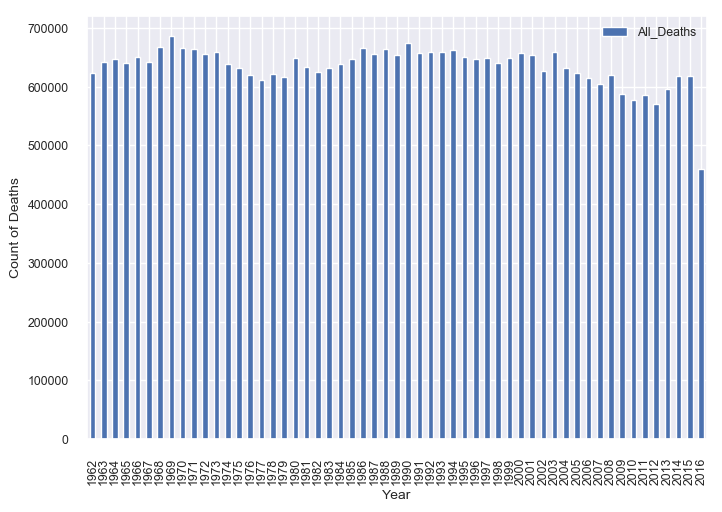

In [40]:
sns.set(font_scale = 0.8)
us_deaths_data_by_year.plot(kind='bar',x='Year',y='All_Deaths', color= 'b')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count of Deaths', fontsize=10)
plt.xticks(rotation = 90)

#### Observations

1. The most number of deaths happened in the year of 1969.  
2. There is no clear pattern in the number of deaths across years, except that count of deaths reduced drastically in 2016.

<a id=section412></a>
### 4.12 Find the distribution of count of Flu deaths across the Years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

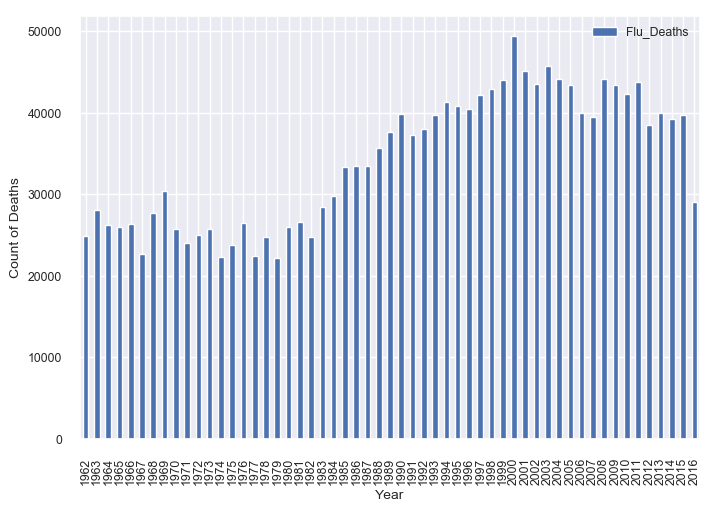

In [41]:
sns.set(font_scale = 0.8)
us_deaths_data_by_year.plot(kind='bar',x='Year',y='Flu_Deaths', color= 'b')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count of Deaths', fontsize=10)
plt.xticks(rotation=90)

#### Observations

1. The most number of flu deaths happened in the year of 2000.  
2. There is a clear pattern in the number of flu related deaths across years. The number of flu related deaths have been increasing gradually since 1985.

<a id=section413></a>
### 4.13 Find the distribution of count of deaths across different age grouping and the Years

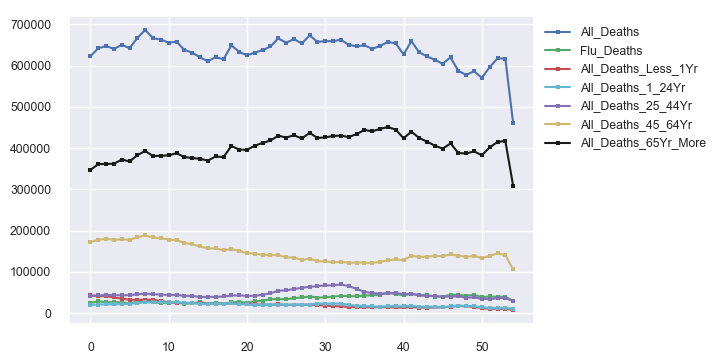

In [42]:
sns.set(font_scale = 0.8)
plt.figure(figsize=(6,4))
plt.plot(us_deaths_data_by_year['All_Deaths'],'-sb',markersize = 3)
plt.plot(us_deaths_data_by_year['Flu_Deaths'],'-sg',markersize = 3)
plt.plot(us_deaths_data_by_year['All_Deaths_Less_1Yr'],'-sr',markersize = 3)
plt.plot(us_deaths_data_by_year['All_Deaths_1_24Yr'],'-sc',markersize = 3)
plt.plot(us_deaths_data_by_year['All_Deaths_25_44Yr'],'-sm',markersize = 3)
plt.plot(us_deaths_data_by_year['All_Deaths_45_64Yr'],'-sy',markersize = 3)
plt.plot(us_deaths_data_by_year['All_Deaths_65Yr_More'],'-sk',markersize = 3)
plt.legend(bbox_to_anchor=(1, 1))

#### Observations

1. The death in the age group of 65 years or more, follows the relative pattern as the all death counts.     
2. The death tolls in the age group of 0 to 64 is relatively lower compared to the age group 65 years & more.   

<a id=section414></a>
### 4.14 Find the distribution across different death grouping and the Years where the death count is low

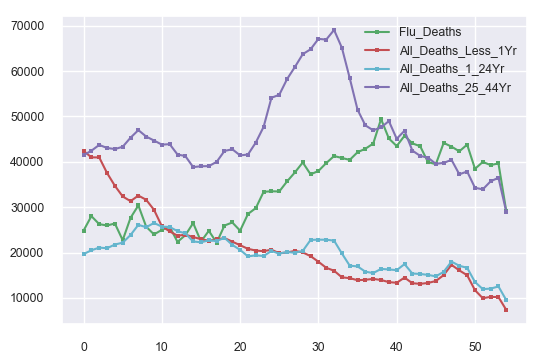

In [43]:
sns.set(font_scale = 0.8)
plt.figure(figsize=(6,4))
plt.plot(us_deaths_data_by_year['Flu_Deaths'],'-sg',markersize = 3)   
plt.plot(us_deaths_data_by_year['All_Deaths_Less_1Yr'],'-sr',markersize = 3)
plt.plot(us_deaths_data_by_year['All_Deaths_1_24Yr'],'-sc',markersize = 3)
plt.plot(us_deaths_data_by_year['All_Deaths_25_44Yr'],'-sm',markersize = 3)
plt.legend(bbox_to_anchor=(1, 1))

#### Observations

1. The death in the age group of 0 to 44 years has a relatively lesser count compared to other age groups.     
2. The death toll in the age group 25 to 44 years peaked up during 1982 to 1997.
3. The count of flu related deaths has gradually increased in the age group 0 to 44 years.

<a id=section415></a>
### 4.15 Find the distribution of all deaths by State

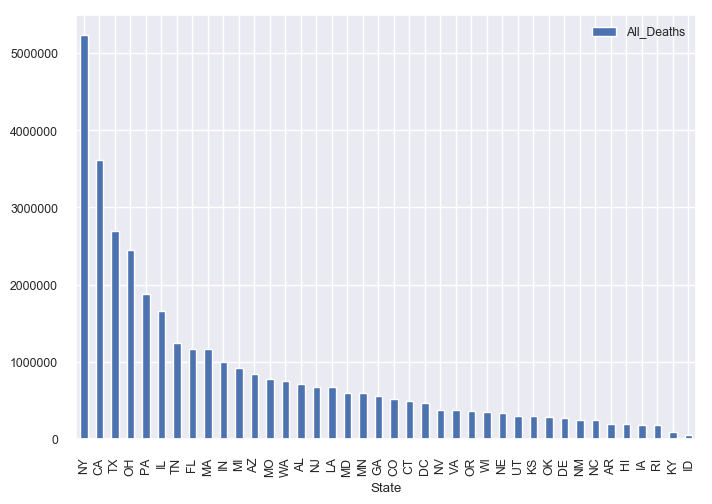

In [44]:
sns.set(font_scale = 0.8)
cx = us_deaths_data_by_state.plot(kind='bar',x='State',y='All_Deaths', color= 'b')

#### Observations

1. New York, California, Texas, Ohio, Pennsylvania and Illinoi has the highest count of all deaths.
2. Similarly, Idaho, Kentucky, Rhode Island, Iowa, Hawaii etc have the lowest count of all deaths.

<a id=section416></a>
### 4.16 Find the relationship between Year, Region, All Deaths and Flu Deaths

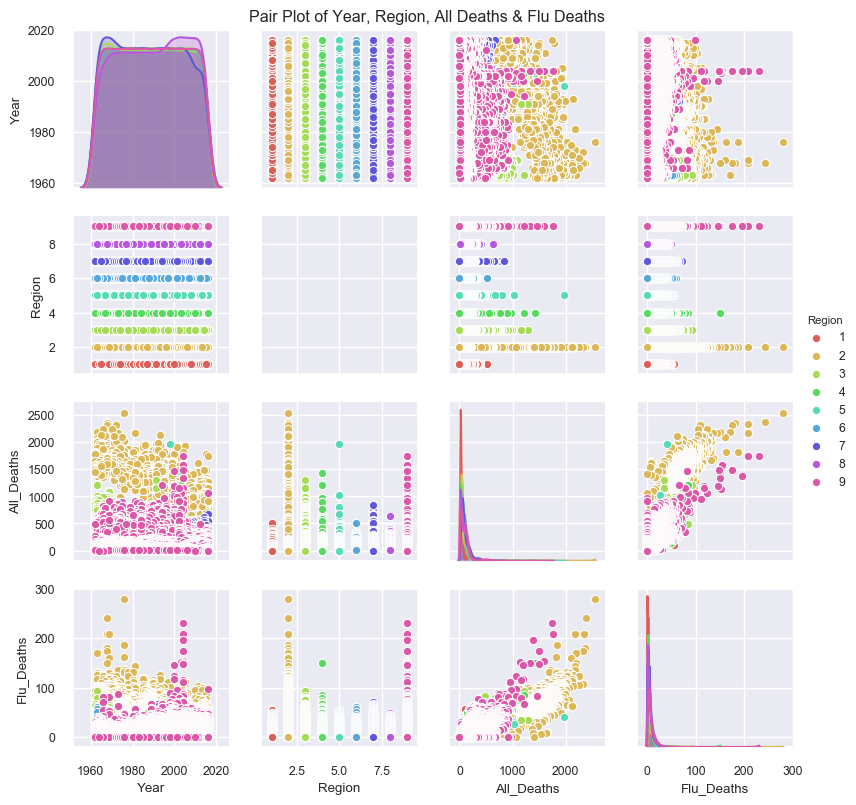

In [45]:
sns.set_style("darkgrid")
sns_plot = sns.pairplot(us_deaths_data_nonull, hue = "Region", palette="hls", \
             vars = ["Year", "Region", "All_Deaths", "Flu_Deaths"], size = 2.0)
sns_plot.fig.suptitle("Pair Plot of Year, Region, All Deaths & Flu Deaths", y=1.00)
plt.show()

#### Observations

1. Pairplot of the key data elements. 
2. Most observations are convered under other plots in the notebook.

<a id=section417></a>
### 4.17 Find the correlation between all the features using heatmap

Text(0.5,1,'Correlation between features')

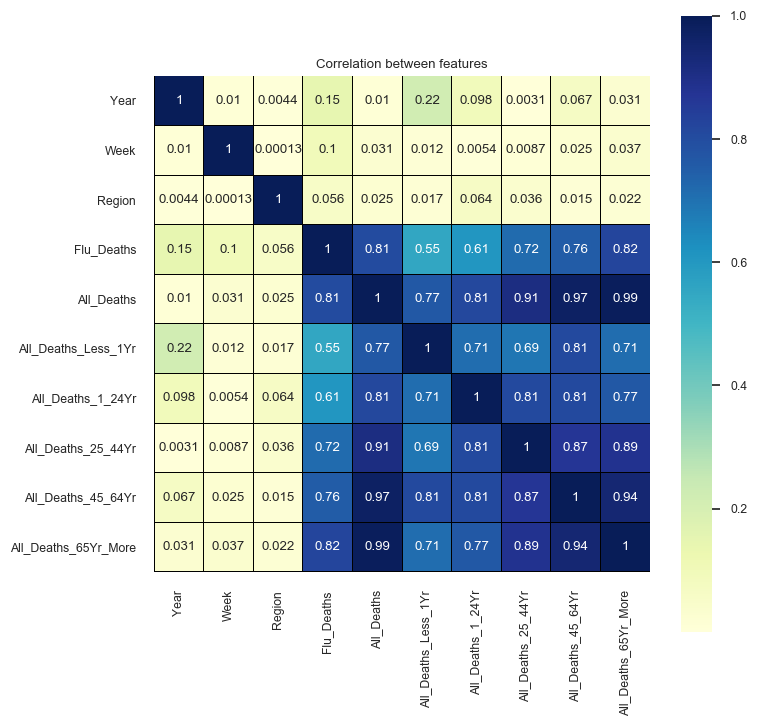

In [46]:
corr_matrix = us_deaths_data_nonull.corr().abs()
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix,vmax=1.0, linewidth=.01, square=True, annot=True, cmap='YlGnBu', linecolor ='black')
plt.title('Correlation between features')

#### Observations

1. All age groups have a strong correlation with All deaths & Flu deaths.

<a id=section418></a>
### 4.18 Hypothesis: Flu is not the primary reason for the counts of deaths across US

The __observations__ for above excercises, clearly shows that the __Flu related__ deaths across US is proportionate to __All deaths__ in various regions & sates except the State of __New York__, where it contributes a a negligible count towards the death toll. The city of __Ultica__ has the lowest count of all deaths. The city of __Schenectady__ has the lowest flu related deaths. However, __Flu deaths__ makes a smaller subset of the total deaths across __USA__.

<a id=section5></a>
## 5. Conclusion 

- The most important inference drawn from all this analysis is, we get to know what are the __Flu__ has been a major cause of deaths across US except in the state of __New York__. In the state of __New York__ there were other causes, which largely contributed to __All Deaths__.
- The observations from the excercise clearly shows the co-relation between the __All Deaths__ & __Flu Deaths__ and the various __Age Groups__.
- There is a clear pattern in the number of __Flu related deaths__ across years. The number of __Flu related deaths__ have been increasing gradually since __1985__.
- From the pie chart, it is clear that, the count of __Flu related deaths__ are proportional to the count of all deaths in a given __Regions__.
- __New York, California, Texas, Ohio, Pennsylvania and Illinoi__ has the highest count of all deaths.
- Similarly, __Idaho, Kentucky, Rhode Island, Iowa, Hawaii__ etc have the lowest count of all deaths.
- The maximum cumulitive deaths have occurred in the cities of __New York, Chicago, Los Angeles, Philadelphia, Houston, Detroit & Baltimore__. 
- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __pre proceesing__ helps in dealing with irregualities present in the data. We also learnt how to __create new features__ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset. 